In [4]:
import pandas as pd
import numpy as np

reponse = pd.read_csv('C:/Users/chaimae/Desktop/answers.csv', encoding='utf-8')

reponse


,question_id,answer,grade
0,1,محمد صلى الله عليه وسلم,2.0
1,1,خاتم الأنبياء,2.0
2,1,الرسول الأعظم,2.0
3,1,سيد المرسلين,2.0
4,1,صاحب الرسالة الخاتمة,2.0
...,...,...,...
986,10,الكهف,0.0
987,10,الفرقان,0.0
988,10,آل عمران,0.0
989,10,الإسراء,0.0


In [5]:

type = reponse.dtypes
type

question_id      int64
answer          object
grade          float64
dtype: object

In [10]:
# Convert 'reponse' column to strings
reponse['answer'] = reponse['answer'].astype(str)



In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
reponses=reponse['answer']


stop_words = set(stopwords.words("arabic"))
custom_stopwords = ["صفر", "واحد", "اثنان", "ثلاثة", "أربعة", "خمسة", "ستة", "ست", "سبعة", "ثمانية", "تسعة", "عشرة"]
stop_words = stop_words.difference(custom_stopwords)

reponses = reponses.apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]) if pd.notna(x) else np.nan)

reponses

0        محمد صلى الله وسلم
1             خاتم الأنبياء
2             الرسول الأعظم
3              سيد المرسلين
4      صاحب الرسالة الخاتمة
               ...         
986                   الكهف
987                 الفرقان
988                آل عمران
989                 الإسراء
990                    مريم
Name: answer, Length: 991, dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import tensorflow as tf

reponse['grade'].fillna(0, inplace=True)
scores = reponse['grade']
# Utiliser LabelEncoder pour encoder les scores
#le = LabelEncoder()
#reponse['score_encoded'] = le.fit_transform(reponse['score'])

scores = tf.keras.utils.to_categorical(
    scores, num_classes=3, dtype='float32'
)

# Utiliser to_categorical pour obtenir une représentation one-hot des scores
#scores = to_categorical(reponse['score_encoded'])

# Afficher les premières lignes du DataFrame après l'encodage
reponse

,question_id,answer,grade
0,1,محمد صلى الله عليه وسلم,2.0
1,1,خاتم الأنبياء,2.0
2,1,الرسول الأعظم,2.0
3,1,سيد المرسلين,2.0
4,1,صاحب الرسالة الخاتمة,2.0
...,...,...,...
986,10,الكهف,0.0
987,10,الفرقان,0.0
988,10,آل عمران,0.0
989,10,الإسراء,0.0


In [14]:
def clean_text(text):
    # Define the characters you want to remove
    characters_to_remove = ["''", ':', '؟']

    # Remove specified characters
    for char in characters_to_remove:
        text = text.replace(char, '')

    return text

# Apply the clean_text function to the 'text' column
reponse['answer'] = reponse['answer'].apply(clean_text)

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# Utiliser Tokenizer pour tokeniser les réponses
tokenizer = Tokenizer(filters=''''!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''''' )
tokenizer.fit_on_texts(reponse['answer'])
sequences = tokenizer.texts_to_sequences(reponse['answer'])

# Padding des séquences pour avoir la même longueur
padded_sequences = pad_sequences(sequences)

# Afficher les premières lignes des séquences après le padding
sequences


[[15, 8, 1, 3, 7],
 [110, 90],
 [51, 321],
 [111, 242],
 [155, 322, 243],
 [6, 43, 44, 437, 438, 19],
 [155, 188, 243],
 [19, 1, 43, 323, 1, 65, 112, 113, 439, 440, 441, 65, 324],
 [6, 43, 691, 1, 442, 692, 4, 20, 34],
 [19, 1, 43, 693, 244, 98, 113],
 [19, 1, 43, 694, 113],
 [19, 1, 43, 83, 695, 696],
 [245, 15],
 [697, 15, 8, 1, 3, 7],
 [51, 15],
 [6, 698, 15, 8, 1, 3, 7],
 [96, 1, 15, 8, 1, 3, 7],
 [245, 246, 15, 8, 1, 3, 7],
 [6, 15, 96, 1],
 [51, 189, 15, 8, 1, 3, 7],
 [6, 15, 110, 699],
 [51, 15, 110, 90],
 [443, 15, 8, 1, 3, 7],
 [19, 444, 15, 8, 1, 3, 7],
 [111, 242, 15, 8, 1, 3, 7],
 [6, 15, 111, 90, 156],
 [6, 15, 110, 247],
 [6, 15, 111, 90, 156],
 [15, 118, 190, 1],
 [6, 15],
 [96, 1],
 [110, 247],
 [51, 248, 3, 9],
 [248],
 [700, 249, 3, 9],
 [6, 191, 3, 9],
 [51, 445, 3, 9],
 [701, 118, 446, 12, 1, 325],
 [6, 114, 3, 9],
 [51, 250, 3, 9],
 [6, 249, 3, 9],
 [19, 251],
 [702, 703],
 [704, 705],
 [706, 707],
 [708, 246],
 [96, 324],
 [19, 709],
 [710, 157],
 [711, 712],
 [11

In [16]:
import gensim.downloader as api

fasttext_model = api.load("fasttext-wiki-news-subwords-300")
print(f"Dimension d'un vecteur du modèle FastText : {fasttext_model.vector_size}")

[==================================================] 100.0% 958.5/958.4MB downloaded
Dimension d'un vecteur du modèle FastText : 300


In [18]:
import numpy as np

# Création de la matrice d'embedding en utilisant le modèle FastText
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, fasttext_model.vector_size))
for word, idx in tokenizer.word_index.items():
    if word in fasttext_model:
        embedding_matrix[idx] = fasttext_model[word]
    else:

        print("Word not exist in vocab: " + word)
        count += 1
        print(count)

# Afficher la forme de la matrice d'embedding
print(f"Forme de la matrice d'embedding : {embedding_matrix.shape}")


Word not exist in vocab: الأنفال


NameError: name 'count' is not defined

In [19]:

embedding_matrix



array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.12857001, -0.067672  , -0.043523  , ..., -0.05354   ,
         0.02587   , -0.032317  ],
       [-0.048205  ,  0.0026655 , -0.010677  , ..., -0.03442   ,
         0.053861  ,  0.018928  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [20]:
from sklearn.model_selection import train_test_split


# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, scores, test_size=0.2, random_state=42)


In [21]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

LSTM



Epoch 1/100


25/25 [==============================] - 4s 48ms/step - loss: 13.0418 - accuracy: 0.5152 - recall_m: 0.0158 - precision_m: 0.1960 - f1_m: 0.0278 - val_loss: 6.2796 - val_accuracy: 0.5477 - val_recall_m: 0.1524 - val_precision_m: 0.6286 - val_f1_m: 0.2376
Epoch 2/100
25/25 [==============================] - 1s 23ms/step - loss: 3.3626 - accuracy: 0.5303 - recall_m: 0.2713 - precision_m: 0.6031 - f1_m: 0.3377 - val_loss: 1.8800 - val_accuracy: 0.5477 - val_recall_m: 0.0446 - val_precision_m: 0.5714 - val_f1_m: 0.0802
Epoch 3/100
25/25 [==============================] - 1s 21ms/step - loss: 1.5370 - accuracy: 0.5303 - recall_m: 0.2129 - precision_m: 0.6649 - f1_m: 0.2945 - val_loss: 1.3173 - val_accuracy: 0.5477 - val_recall_m: 0.3425 - val_precision_m: 0.6115 - val_f1_m: 0.4368
Epoch 4/100
25/25 [==============================] - 1s 25ms/step - loss: 1.2664 - accuracy: 0.5227 - recall_m: 0.3125 - precision_m: 0.5516 - f1_m: 0.3828 - val_loss: 1.2232 - val_accuracy: 0.5477

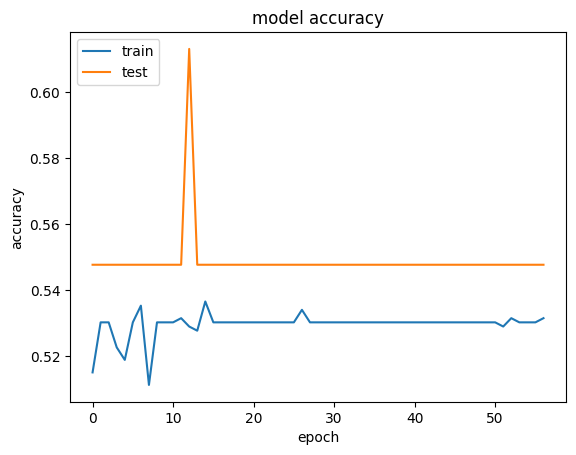

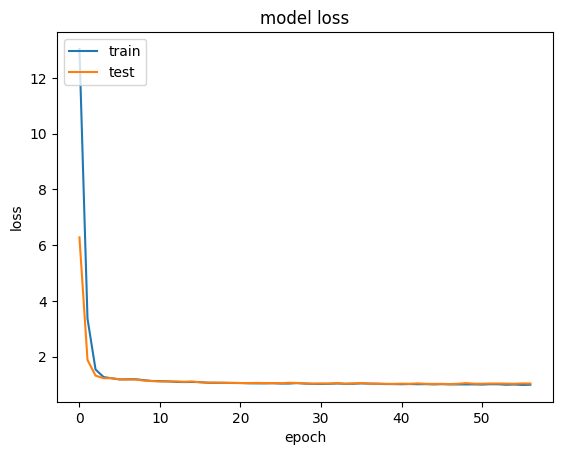

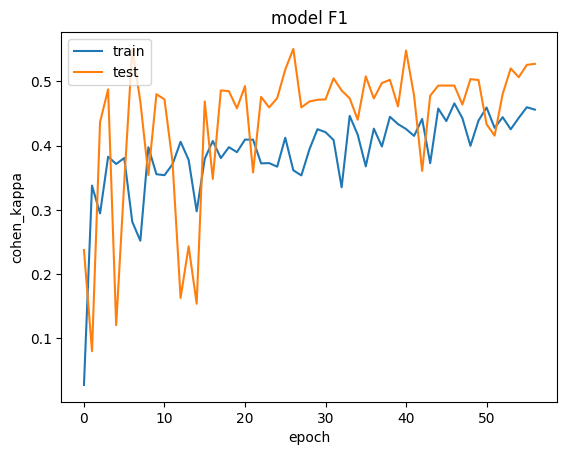

In [22]:
from keras.regularizers import l1
from keras.models import Sequential
from keras.layers import Dense, Embedding, Input, Dropout, Flatten
from keras.layers import LSTM
from keras.models import Model
from keras.callbacks import EarlyStopping


inp = Input(shape=(padded_sequences.shape[1],))  #  deuxième dimension  matrice

model = Embedding(input_dim=len(tokenizer.word_index) + 1,
                  output_dim=fasttext_model.vector_size,
                  weights=[embedding_matrix],
                  input_length=padded_sequences.shape[1],
                  trainable=False)(inp)


model = LSTM(units=64, return_sequences=True, return_state=False, activation='relu')(model)
model = Dropout(0.2)(model)
# Aplatir les sorties de la couche LSTM en une seule dimension
model = Flatten()(model)
model = Dense(32, activation='relu', kernel_regularizer=l1(0.01))(model)
model = Dense(3, activation='softmax', kernel_regularizer=l1(0.01))(model)
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
# Création du modèle fonctionnel avec la spécification des couches d'entrée et de sortie
model = Model(inputs=inp, outputs=model)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', recall_m, precision_m, f1_m])
# Entraînement du modèle
h=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stop])
import matplotlib.pyplot as plt
print(h.history.keys())

# summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(h.history['f1_m'])
plt.plot(h.history['val_f1_m'])
plt.title('model F1')
plt.ylabel('cohen_kappa')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




Transformers

In [23]:

# Dimensions des embeddings
maxlen = padded_sequences.shape[1] 
vocab_size = len(tokenizer.word_index) + 1
embed_dim = fasttext_model.vector_size
num_heads = 8
ff_dim = 64
rate = 0.1
embed_dim


300

In [24]:
from tensorflow import keras
from tensorflow.keras import layers, models

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim ,embedding_matrix):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size,weights=[embedding_matrix], output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)
        
    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [25]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential([layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


Epoch 1/100
25/25 [==============================] - 11s 326ms/step - loss: 1.4860 - accuracy: 0.4470 - recall_m: 0.3929 - precision_m: 0.4445 - f1_m: 0.4148 - val_loss: 1.0989 - val_accuracy: 0.3668 - val_recall_m: 0.3737 - val_precision_m: 0.3750 - val_f1_m: 0.3744
Epoch 2/100
25/25 [==============================] - 6s 244ms/step - loss: 0.9862 - accuracy: 0.5114 - recall_m: 0.4300 - precision_m: 0.5349 - f1_m: 0.4747 - val_loss: 0.9387 - val_accuracy: 0.4925 - val_recall_m: 0.4388 - val_precision_m: 0.5205 - val_f1_m: 0.4752
Epoch 3/100
25/25 [==============================] - 6s 242ms/step - loss: 0.9508 - accuracy: 0.5177 - recall_m: 0.4363 - precision_m: 0.5561 - f1_m: 0.4849 - val_loss: 1.0504 - val_accuracy: 0.3970 - val_recall_m: 0.3916 - val_precision_m: 0.4055 - val_f1_m: 0.3981
Epoch 4/100
25/25 [==============================] - 6s 246ms/step - loss: 0.8640 - accuracy: 0.5707 - recall_m: 0.5108 - precision_m: 0.6098 - f1_m: 0.5548 - val_loss: 0.9385 - val_accuracy: 0.6281

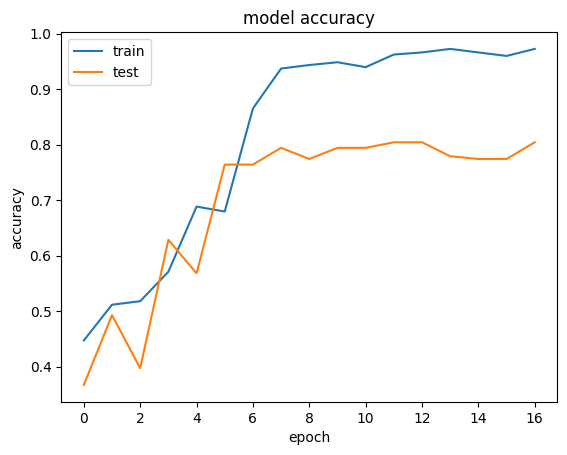

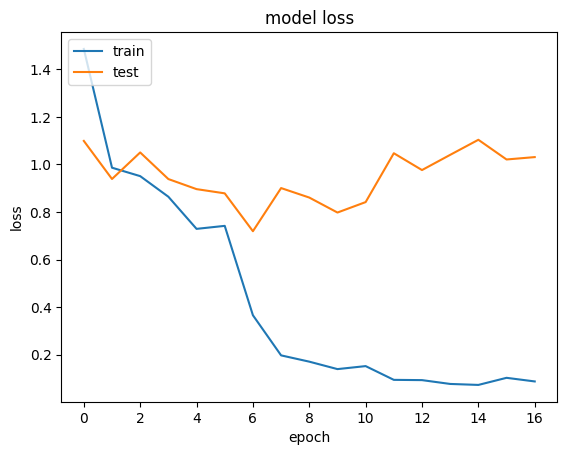

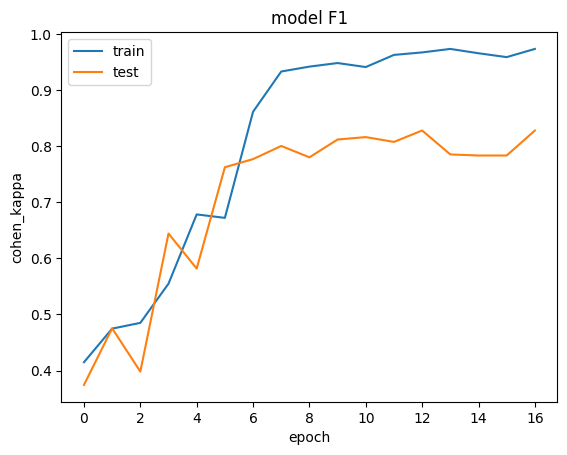

In [26]:
inputs = layers.Input(shape=(maxlen,))  
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim,embedding_matrix)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim,0.3)
x = transformer_block(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.1)(x)
# x = layers.Dense(5, activation="relu")(x)  # Vous pouvez ajouter ces lignes si nécessaire
# x = layers.Dropout(0.1)(x)
outputs = layers.Dense(3, activation="softmax")(x)
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', recall_m, precision_m, f1_m])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stop])
import matplotlib.pyplot as plt
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('model F1')
plt.ylabel('cohen_kappa')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/100
25/25 [==============================] - 3s 48ms/step - loss: 1.0306 - accuracy: 0.4987 - recall_m: 0.0787 - precision_m: 0.3330 - f1_m: 0.1163 - val_loss: 0.9439 - val_accuracy: 0.5477 - val_recall_m: 0.2462 - val_precision_m: 0.5708 - val_f1_m: 0.3410
Epoch 2/100
25/25 [==============================] - 1s 29ms/step - loss: 0.9222 - accuracy: 0.5278 - recall_m: 0.2788 - precision_m: 0.6361 - f1_m: 0.3787 - val_loss: 0.9239 - val_accuracy: 0.5477 - val_recall_m: 0.3827 - val_precision_m: 0.6232 - val_f1_m: 0.4732
Epoch 3/100
25/25 [==============================] - 1s 30ms/step - loss: 0.9142 - accuracy: 0.5139 - recall_m: 0.2500 - precision_m: 0.6016 - f1_m: 0.3459 - val_loss: 0.9291 - val_accuracy: 0.5477 - val_recall_m: 0.3871 - val_precision_m: 0.6224 - val_f1_m: 0.4765
Epoch 4/100
25/25 [==============================] - 1s 29ms/step - loss: 0.9197 - accuracy: 0.5316 - recall_m: 0.2954 - precision_m: 0.6015 - f1_m: 0.3865 - val_loss: 0.9275 - val_accuracy: 0.5477 - va

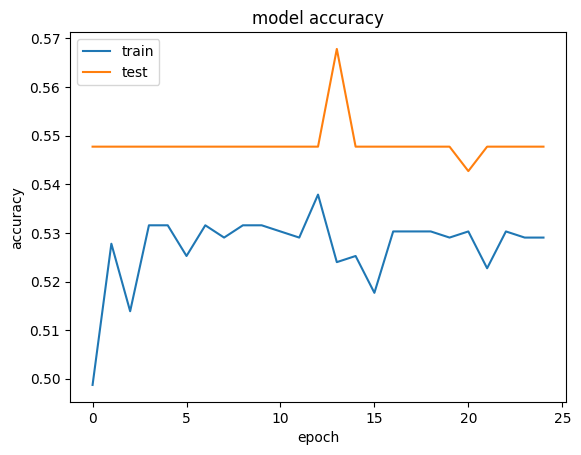

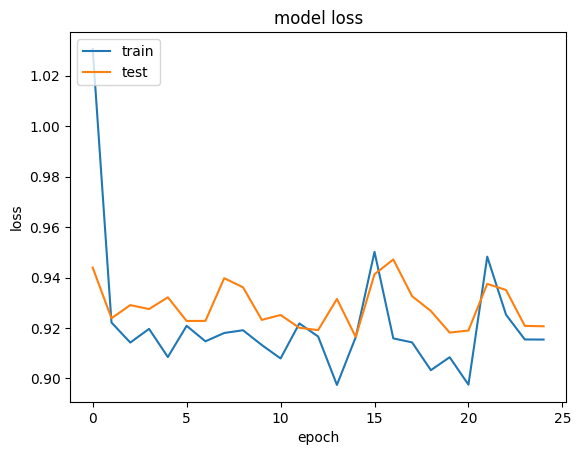

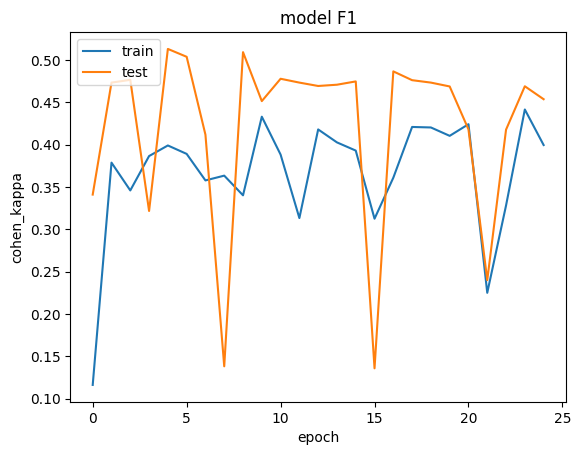

In [27]:
from keras.layers import SimpleRNN
import matplotlib.pyplot as plt
from keras.optimizers import Adamax
# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=300, input_length=padded_sequences.shape[1], trainable=False, weights=[embedding_matrix]))
model.add(LSTM(units=64, activation='relu', return_sequences=True))
model.add(LSTM(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # Assuming binary classification, adjust for multi-class


learning_rate = 0.01
optimizer = Adamax(learning_rate=learning_rate)
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', recall_m, precision_m, f1_m])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stop])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('model F1')
plt.ylabel('cohen_kappa')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

